In [1]:
# Graphes
%matplotlib inline
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Eviter les warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

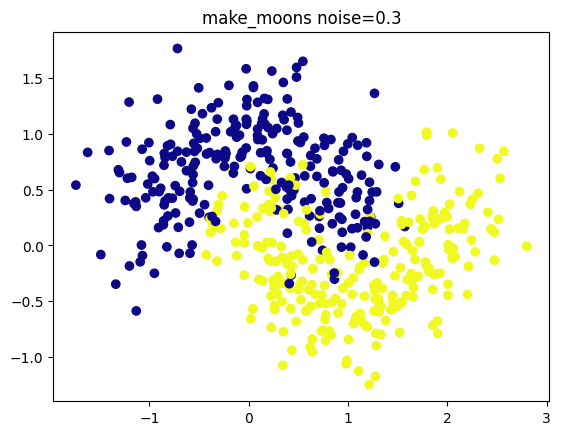

In [2]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X[:,0],X[:,1], c = y,cmap='plasma');
plt.title('make_moons noise=0.3')
plt.show()

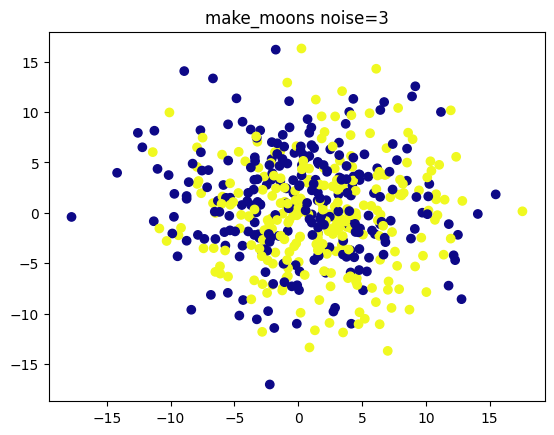

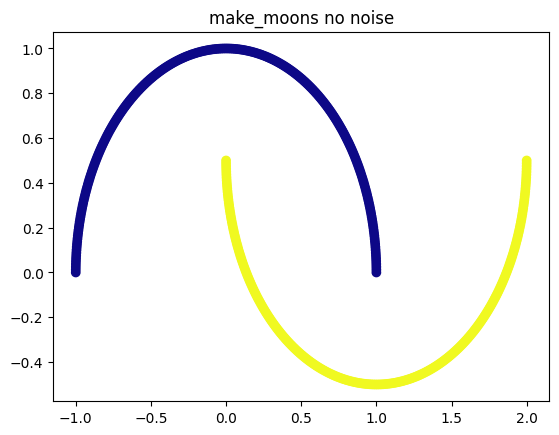

In [3]:
X_noisy, y_noisy = make_moons(n_samples=500, noise=5, random_state=42)
plt.scatter(X_noisy[:,0],X_noisy[:,1], c = y_noisy,cmap='plasma');
plt.title('make_moons noise=3')
plt.show()
X_noisy, y_noisy = make_moons(n_samples=500, random_state=42)
plt.scatter(X_noisy[:,0],X_noisy[:,1], c = y_noisy,cmap='plasma');
plt.title('make_moons no noise')
plt.show()


In [4]:
log_clf = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=2)
bayes_clf = GaussianNB()

voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('tf', tree_clf),
                                          ('by', bayes_clf)],
                              voting='hard')


In [5]:
# import warnings
# warnings.filterwarnings("ignore",category=FutureWarning)

dict_scores={}
for clf in (log_clf, tree_clf, bayes_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    dict_scores[clf.__class__.__name__]=accuracy_score(y_test, y_pred)
dict_scores


{'LogisticRegression': 0.864,
 'DecisionTreeClassifier': 0.896,
 'GaussianNB': 0.856,
 'VotingClassifier': 0.856}

In [6]:
voting_soft_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('tr', tree_clf),
                                          ('by', bayes_clf)],
                              voting='soft')
voting_soft_clf.fit(X_train, y_train)
y_pred = voting_soft_clf.predict(X_test)
dict_scores['VotingClassifier Soft']=accuracy_score(y_test, y_pred)
dict_scores


{'LogisticRegression': 0.864,
 'DecisionTreeClassifier': 0.896,
 'GaussianNB': 0.856,
 'VotingClassifier': 0.856,
 'VotingClassifier Soft': 0.88}